<a href="https://colab.research.google.com/github/rahmat-wi/Submisi-Dicoding/blob/main/Submission_Rahmat_Wibowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow dan keras
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Check versi tensorflow
print(tf.__version__)

2.2.0


In [ ]:
# Download data file
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
  

--2020-07-17 19:14:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  15.4MB/s    in 19s     

2020-07-17 19:14:26 (16.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_directory='/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_directory)

['rock', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
# validation set = 0.4 

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data
        target_size=(100, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        batch_size=4,
        
        subset='training') # subset training untuk data latih

validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        batch_size=4, 
        subset='validation')# subset validation untuk data validation

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=8,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=40,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/40
8/8 - 0s - loss: 0.2795 - accuracy: 0.9375 - val_loss: 0.6601 - val_accuracy: 0.9000
Epoch 2/40
8/8 - 0s - loss: 0.5232 - accuracy: 0.8750 - val_loss: 0.0901 - val_accuracy: 1.0000
Epoch 3/40
8/8 - 0s - loss: 0.1578 - accuracy: 0.9688 - val_loss: 0.1219 - val_accuracy: 0.9500
Epoch 4/40
8/8 - 0s - loss: 0.0835 - accuracy: 0.9688 - val_loss: 0.1430 - val_accuracy: 0.9500
Epoch 5/40
8/8 - 0s - loss: 0.1921 - accuracy: 0.9375 - val_loss: 0.3515 - val_accuracy: 0.9500
Epoch 6/40
8/8 - 0s - loss: 0.2059 - accuracy: 0.9062 - val_loss: 0.0775 - val_accuracy: 1.0000
Epoch 7/40
8/8 - 0s - loss: 0.0935 - accuracy: 1.0000 - val_loss: 0.4103 - val_accuracy: 0.8000
Epoch 8/40
8/8 - 0s - loss: 0.4044 - accuracy: 0.8438 - val_loss: 0.1706 - val_accuracy: 0.9000
Epoch 9/40
8/8 - 0s - loss: 0.5596 - accuracy: 0.8438 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 10/40
8/8 - 0s - loss: 0.3641 - accuracy: 0.8750 - val_loss: 0.1605 - val_accuracy: 1.0000
Epoch 11/40
8/8 - 0s - loss: 0.3128 - a

In [ ]:
# import library 
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
classes = model.predict(images, batch_size=10)
print(classes.shape)
# print shape classes dilakukan untuk mengecheck shape array numpy class.

(1, 3)


Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
rock


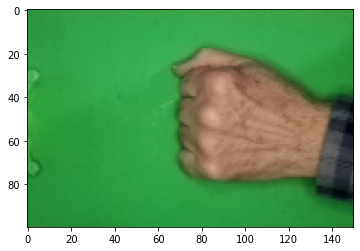

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissor')
  else:
    print('unknown')